In [1]:
import json
import requests
from bs4 import BeautifulSoup as bs

## 9gag

步驟與上面類似：
1. 到9gag搜尋meme：得到網址為https://9gag.com/search?query=meme
2. 按F12打開開發者工具往下滑，會看到紅線處的網址  
<img src="./dev_9gag.png" style="width:500px;">
3. （直接搜尋該網址，或是用python發出requests）會得到`json`格式的文字（一頁有10張）
4. 從`json`格式中提取需要的圖片網址

In [2]:
imgss = set()
num_to_crawl = 100
for cnt in range(0, num_to_crawl, 10):
    res = requests.get("https://9gag.com/v1/tag-posts/tag/meme/type/hot?c=" + str(cnt))
    dic = json.loads(res.text)
    imgs = dic["data"]["posts"]
    for img in imgs:
        if img["type"] == "Photo":
            if img["images"]["image460"]["url"] in imgss:
                print("*******************************")
                print(img["images"]["image460"]["url"])
                print("*******************************")
            imgss.add(img["images"]["image460"]["url"])
            print(img["images"]["image460"]["url"])

https://img-9gag-fun.9cache.com/photo/aPYLD4n_460s.jpg
https://img-9gag-fun.9cache.com/photo/aXY3pV2_460s.jpg
https://img-9gag-fun.9cache.com/photo/abYDZVv_460s.jpg
https://img-9gag-fun.9cache.com/photo/av8qZLq_460s.jpg
https://img-9gag-fun.9cache.com/photo/aoe6XLe_460s.jpg
https://img-9gag-fun.9cache.com/photo/aGZvYV7_460s.jpg
https://img-9gag-fun.9cache.com/photo/abYo8xB_460s.jpg
https://img-9gag-fun.9cache.com/photo/axzKGrK_460s.jpg
https://img-9gag-fun.9cache.com/photo/a73BgYm_460s.jpg
https://img-9gag-fun.9cache.com/photo/aZLKo30_460s.jpg
https://img-9gag-fun.9cache.com/photo/a6OgLWb_460s.jpg
https://img-9gag-fun.9cache.com/photo/a9KwPpo_460s.jpg
https://img-9gag-fun.9cache.com/photo/abYoE6v_460s.jpg
https://img-9gag-fun.9cache.com/photo/aR1GGP2_460s.jpg
https://img-9gag-fun.9cache.com/photo/arG00XB_460s.jpg
https://img-9gag-fun.9cache.com/photo/amByMed_460s.jpg
https://img-9gag-fun.9cache.com/photo/aoe6qLw_460s.jpg
https://img-9gag-fun.9cache.com/photo/a9KwPML_460s.jpg
https://im

## Imgur

步驟與上面類似：
1. 到imgur搜尋#meme：得到網址為https://imgur.com/t/meme/top/all
2. 按F12打開開發者工具往下滑，會看到紅線處的網址  
<img src="./dev_imgur.png" style="width:500px;">
3. （直接搜尋該網址，或是用python發出requests）這次會得到一個看起來沒有css加工過的網頁（一頁有60張圖片）
4. 在圖片上右鍵 > 檢查，可以看到圖片的網址  
<img src="./investigate_imgur.png" style="width:500px;">
5. 因為發現找到的圖片只有160x160，因此再點進去看大圖的網址，發現圖片名只差了一個 'b'，例如：小圖：xxxxb.jpg、大圖：xxxx.jpg

In [3]:
num_to_crawl = 100
for cnt in range(0, num_to_crawl // 60 + 1, 1):
    res = requests.get("https://imgur.com/t/meme/top/all/page/" + str(cnt) + "/hit?scrolled")
    soup = bs(res.content, 'html.parser')
    imgs = soup.select('a > img')
    for img in imgs:
        print("https:" + img['src'][:-5] + img['src'][-4:])

https://i.imgur.com/v3kmplx.jpg
https://i.imgur.com/8iiChzd.jpg
https://i.imgur.com/BfKkgr1.jpg
https://i.imgur.com/4CwFKJl.jpg
https://i.imgur.com/oTshn4V.jpg
https://i.imgur.com/nLxOl3B.jpg
https://i.imgur.com/HWye5mh.jpg
https://i.imgur.com/ztsyH1h.jpg
https://i.imgur.com/jwgK2kG.jpg
https://i.imgur.com/7jFWlsN.jpg
https://i.imgur.com/39XeDFj.jpg
https://i.imgur.com/PuboKJ8.jpg
https://i.imgur.com/TeZPHqe.jpg
https://i.imgur.com/ZXyOx60.jpg
https://i.imgur.com/JMyRupS.jpg
https://i.imgur.com/SdhcioZ.jpg
https://i.imgur.com/ISfpRae.jpg
https://i.imgur.com/rCUKdfV.jpg
https://i.imgur.com/jQdEpPi.jpg
https://i.imgur.com/UowBK3z.jpg
https://i.imgur.com/uxoGeAY.jpg
https://i.imgur.com/3a81Obo.jpg
https://i.imgur.com/FD9l0GB.jpg
https://i.imgur.com/5FnBYPZ.jpg
https://i.imgur.com/YBaOtH5.jpg
https://i.imgur.com/J6TpkEP.jpg
https://i.imgur.com/J8G70kk.jpg
https://i.imgur.com/D2vl0bf.jpg
https://i.imgur.com/1WY3F6S.jpg
https://i.imgur.com/pJ62F1a.jpg
https://i.imgur.com/oGctO9a.jpg
https://

## Load image as python numpy array

In [4]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

### 9gag

<img src="https://img-9gag-fun.9cache.com/photo/aB0MN4A_460s.jpg" style="width:350px;">

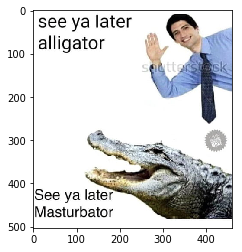

In [5]:
img_url = "https://img-9gag-fun.9cache.com/photo/aB0MN4A_460s.jpg"
res = requests.get(img_url)
img = np.array(Image.open(BytesIO(res.content)))
plt.imshow(img)

### Imgur

<img src="https://i.imgur.com/fOudv4Y.jpg" style="width:500px;">

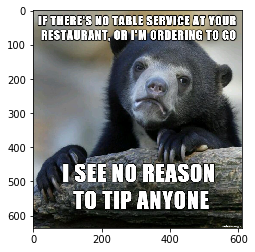

In [6]:
img_url = "https://i.imgur.com/fOudv4Y.jpg"
res = requests.get(img_url)
img = np.array(Image.open(BytesIO(res.content)))
plt.imshow(img)